# Object project

To prepare a Machine Learning model which predicts the chances of a person getting a heart disease by taking a few details of that person.

(Our model will be trained to find pattern from a large collection of data of heart disease patients,taken from a hospital database)

# Data Source

The original data came from the ``Cleveland``(https://archive.ics.uci.edu/ml/datasets/heart+Disease) database from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from `Kaggle`(https://www.kaggle.com/ronitf/heart-disease-uci/).

The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

# Data Dictionary

# Importing libraries,models and evaluators

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#importing models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#importing model evaluators
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,plot_roc_curve
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

#importing visualisers
import seaborn as sns

# Importing Data

In [2]:
df=pd.read_csv("heart-disease-project.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

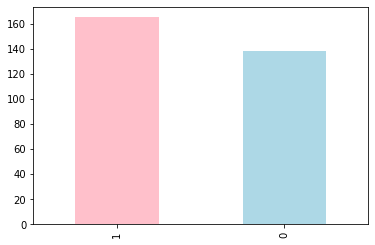

In [5]:
df["target"].value_counts().plot.bar(color=["pink","lightblue"]);

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


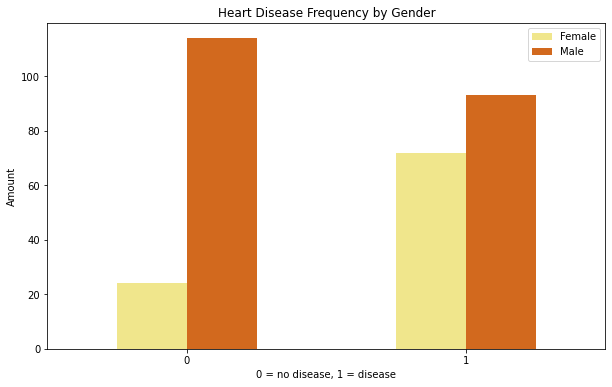

In [7]:
pd.crosstab(df["target"],df["sex"]).plot.bar(figsize=(10,6),color=["khaki","chocolate"])
plt.title("Heart Disease Frequency by Gender")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

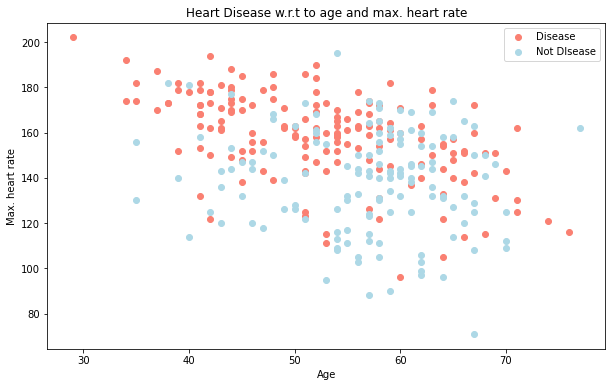

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df['age'][df['target']==1],df['thalach'][df['target']==1],color='salmon');

plt.scatter(df['age'][df['target']==0],df['thalach'][df['target']==0],color='lightblue');
plt.legend(['Disease','Not DIsease'])
plt.title("Heart Disease w.r.t to age and max. heart rate")
plt.xlabel("Age")
plt.ylabel("Max. heart rate");

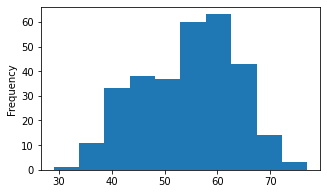

In [9]:
df['age'].plot.hist(figsize=(5,3));

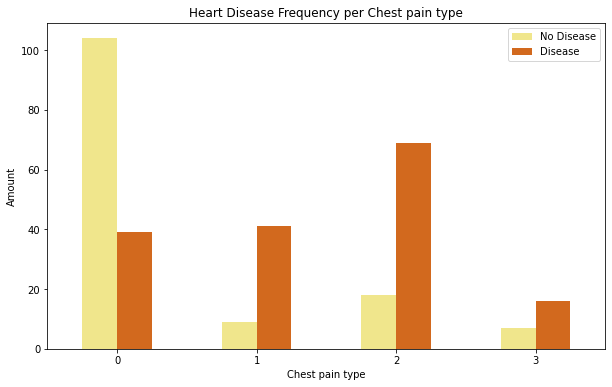

In [10]:
pd.crosstab(df['cp'],df['target']).plot.bar(figsize=(10,6),color=["khaki","chocolate"])
plt.title("Heart Disease Frequency per Chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [11]:
#Finding the correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.0, -0.5)

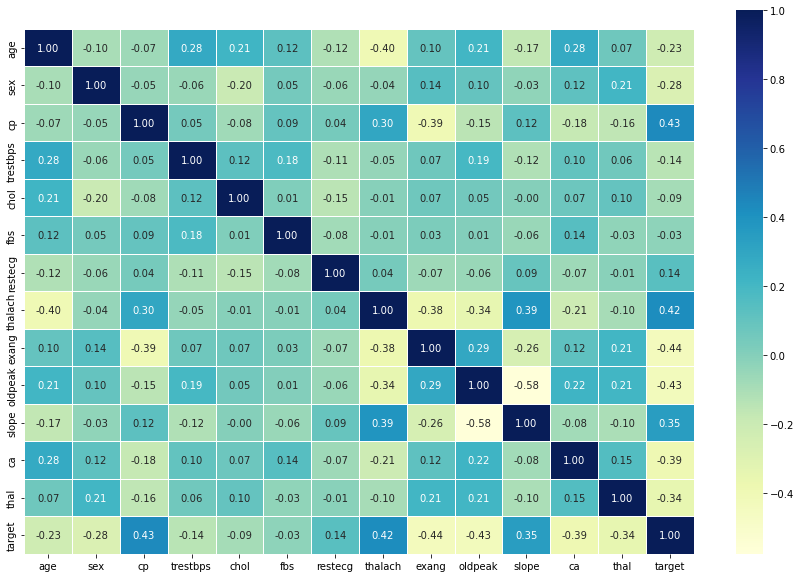

In [12]:
#visualising the correlation matrix
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt='.2f',cmap='YlGnBu')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom +0, top -0.5)

In [13]:
#splitting data
np.random.seed(42)
x=df.drop('target',axis=1)
y=df['target']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# We will try 3 different models :
    1) Logistic Regression
    2) K-Nearest Neighbors
    3) Random Forest Classifier

We will train and test our models and use the most accurate one.....

In [15]:
#putting the models in a dictionary
models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}
results={} #dictionary stores the result of model score

#creating a function to fit and score the model
def fit_score(models,x_train,x_test,y_train,y_test):
        np.random.seed(42)
        for mdl_name,model in models.items():
            model.fit(x_train,y_train)
            results.update({mdl_name:model.score(x_test,y_test)*100})
        return results

In [16]:
fit_score(models,x_train,x_test,y_train,y_test)

C:\Users\asus\Desktop\pro1\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 88.52459016393442,
 'KNN': 68.85245901639344,
 'Random Forest': 83.60655737704919}

# Let's compare the models visually

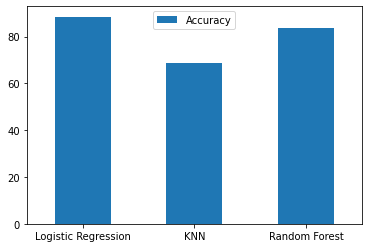

In [17]:
results_compare=pd.DataFrame(results,index=['Accuracy'])
results_compare.T.plot.bar() #T means transpose
plt.xticks(rotation=0);

# Now we have our baseline models; Now let's tune our model hyperparameters

In [18]:
#tuning KNN manually
train_scores=[]
test_scores=[]

#hyperparameter
neighbors=range(1,21)

#instantiating our model
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

The maximum accuracy KNN gives after tuning is 75.41%


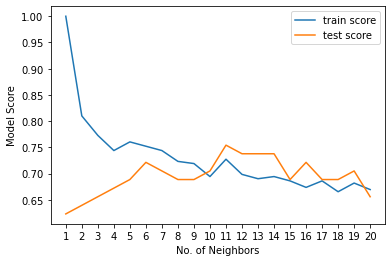

In [19]:
plt.plot(neighbors,train_scores,label='train score')
plt.plot(neighbors,test_scores,label='test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel("No. of Neighbors")
plt.ylabel("Model Score")
plt.legend();
print("The maximum accuracy KNN gives after tuning is ",end="")
print(format(max(test_scores)*100,'.2f')+"%")


# Tuning model hyperparameters using Randomized Search

#### We're going to tune:
    *Logistic Regression
    *Random Forest
   ....using RandomizedSearchCV


In [20]:
np.random.seed(42)
#creating hyperparameter grid for logistic regression
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":['liblinear']}
#creating hyperparameter grid for random forest
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [21]:
#tuning logistic regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [22]:
rs_log_reg.best_params_,rs_log_reg.score(x_test,y_test)


({'solver': 'liblinear', 'C': 0.23357214690901212}, 0.8852459016393442)

In [23]:
#tuning random forest
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [24]:
rs_rf.best_params_,rs_rf.score(x_test,y_test)

({'n_estimators': 360,
  'min_samples_split': 4,
  'min_samples_leaf': 15,
  'max_depth': 5},
 0.8688524590163934)

#### So far, we have best scores on Logistic Regression.
* So, we will continue our endeavour on tuning logistic regression further
 * ....using GridSearch to fine tune our hyperparameters even better and increase the accuracy of model

In [25]:
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":['liblinear']}
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [26]:
gs_log_reg.best_params_,gs_log_reg.score(x_test,y_test)

({'C': 0.20433597178569418, 'solver': 'liblinear'}, 0.8852459016393442)

## Evaluating our model

    *ROC curve and AUC score
    *Confusion Matrix
    *Classification Report
    *PRecision
    *F1
    *Recall

In [27]:
y_pred=gs_log_reg.predict(x_test)

C:\Users\asus\Desktop\pro1\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


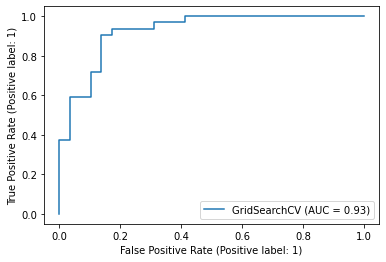

In [28]:
#Let's plot ROC curve
plot_roc_curve(gs_log_reg,x_test,y_test);

In [29]:
#Plotting the confusion matrix
print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


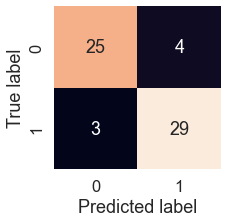

In [30]:
sns.set(font_scale=1.5) 
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, 
                     cbar=False)
    plt.xlabel("Predicted label") 
    plt.ylabel("True label")    
plot_conf_mat(y_test, y_pred)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Cross Validation (for accuracy , precision , recall , f1)

In [32]:
clf=LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')

In [33]:
#for accuracy
cva=cross_val_score(clf,x,y,cv=5,scoring='accuracy')
cva.mean()

0.8446994535519124

In [34]:
#for precision
cvp=cross_val_score(clf,x,y,cv=5,scoring='precision')
cvp.mean()

0.8207936507936507

In [35]:
#for recall
cvr=cross_val_score(clf,x,y,cv=5,scoring='recall')
cvr.mean()

0.9212121212121213

In [36]:
#for f1
cvf=cross_val_score(clf,x,y,cv=5,scoring='f1')
cvf.mean()

0.8673007976269721

### Now lets plot these metrics in a graph

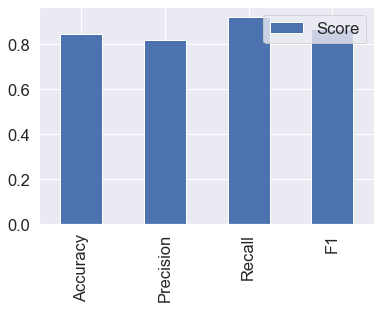

In [37]:
cv_graph=pd.DataFrame({"Accuracy":cva.mean(),
                      "Precision":cvp.mean(),
                      "Recall":cvr.mean(),
                      "F1":cvf.mean()},index=['Score'])
cv_graph.T.plot.bar();

### Feature Importance

In [38]:
clf.fit(x_train,y_train)
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [39]:
feature_dict=dict(zip(df.columns,clf.coef_[0]))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

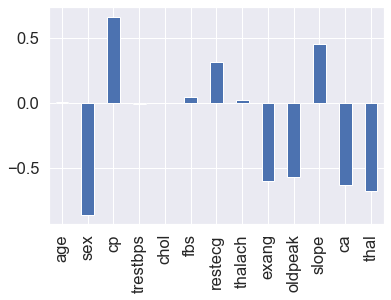

In [40]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(legend=False);

In [41]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [42]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [43]:
from joblib import dump,load
dump(gs_log_reg,filename="Heart_disease_prediction_model.joblib")

['Heart_disease_prediction_model.joblib']